Taking average rating of  cuisines served in number of restaurant > 250 that present in our dataset


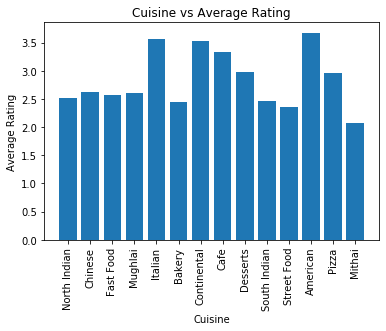

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
obj=pd.read_csv(r"C:\Users\Dell\Desktop\zomato.csv",encoding='ISO-8859–1')
zomato_data=obj.copy()
zomato_data.dropna(inplace=True)
print('Taking average rating of  cuisines served in number of restaurant > 250 that present in our dataset')
cuisine_dict={}
for i in zomato_data['Cuisines'].values:
    cuisine_list=i.split(',')
    for j in cuisine_list:
        if j.strip() in cuisine_dict.keys():
            cuisine_dict[j.strip()]=cuisine_dict.get(j.strip())+1;
        else:
            cuisine_dict[j.strip()]=1

top_cuisine_10=pd.DataFrame(data=list(zip(list(cuisine_dict.keys()),
                            list(cuisine_dict.values())))).sort_values(by=1,ascending=False)
y=top_cuisine_10[1].values
index=0
for j in range(len(y)):
    if y[j]<250:
        index=j-1
        break;
cuisine_list=top_cuisine_10[0].values[0:index]

data=list(zip(zomato_data['Cuisines'],zomato_data['Aggregate rating']))
average_rating=[]
for cuisine in cuisine_list:
    sum=0;
    count=0
    for i in range(len(data)):
        if cuisine in data[i][0]:
            sum=sum+data[i][1]
            count=count+1
    average_rating.append(sum/count)     
plt.bar(cuisine_list,average_rating)
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.title("Cuisine vs Average Rating")
plt.xticks(rotation=90)
plt.show()
            
